In [1]:
import sys
# sys.path.append('')

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

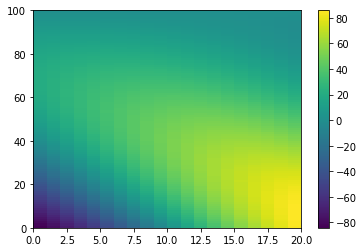

In [2]:
def refer(x,t):
    return 10*(10-t)*torch.sin(x + t/4)

x = torch.linspace(-1,1,20)
t = torch.linspace(0,10,100)
t,x = torch.meshgrid(t,x)
label = refer(x,t)
plt.pcolormesh(label)
plt.colorbar()

class myd(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.u0 = label[:-1].unsqueeze(1)
        self.u1 = label[1:].unsqueeze(1)
    def __getitem__(self, index):
        return self.u0[index], self.u1[index]

    def __len__(self):
        return self.u0.shape[0]

In [3]:
class PixelShuffle1D(torch.nn.Module):
    """
    1D pixel shuffler. https://arxiv.org/pdf/1609.05158.pdf
    Upscales sample length, downscales channel length
    "short" is input, "long" is output
    """
    def __init__(self, upscale_factor):
        super(PixelShuffle1D, self).__init__()
        self.upscale_factor = upscale_factor

    def forward(self, x):
        batch_size = x.shape[0]
        short_channel_len = x.shape[1]
        short_width = x.shape[2]

        long_channel_len = short_channel_len // self.upscale_factor
        long_width = self.upscale_factor * short_width

        x = x.contiguous().view([batch_size, self.upscale_factor, long_channel_len, short_width])
        x = x.permute(0, 2, 3, 1).contiguous()
        x = x.view(batch_size, long_channel_len, long_width)

        return x

In [4]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1,12,6),
            nn.ReLU(),
            nn.Conv1d(12,48,6),
            nn.ReLU(),
            PixelShuffle1D(48),
            nn.Conv1d(1,1,24,stride=24),
            # nn.ReLU(),
            # nn.Conv1d(6,1,5,padding=2),
        )

    def forward(self,x):
        x = self.conv(x)
        return x

0 2.5085113843282065


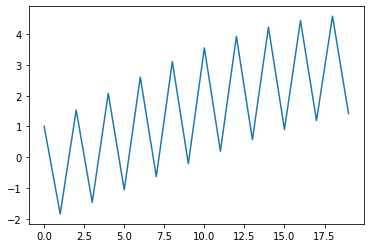

100 0.6771822770436605


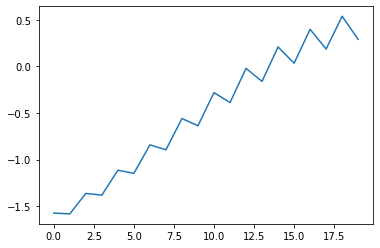

200 0.4730203151702881


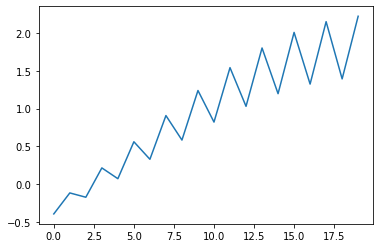

300 0.4458409945170085


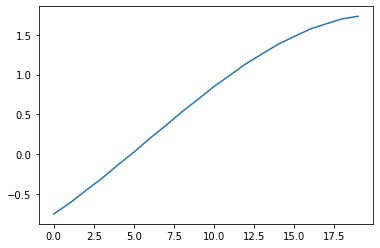

400 0.4599671761194865


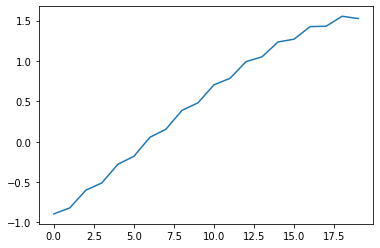

500 0.4722222884496053


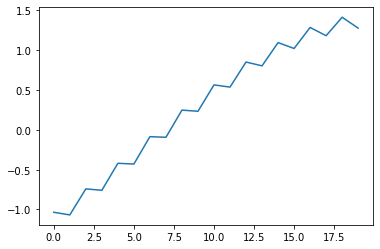

600 0.49701730410257977


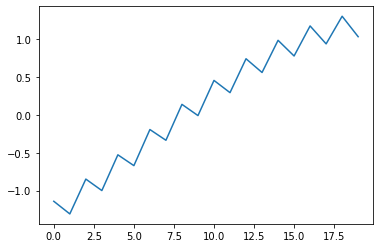

700 0.5133217573165894


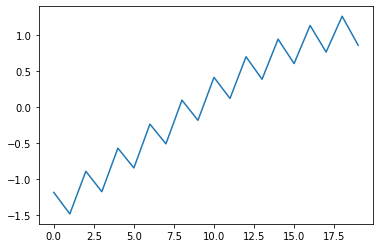

800 0.5142690340677897


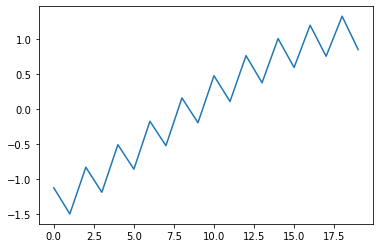

900 0.4826064109802246


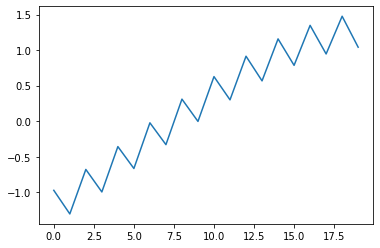

1000 0.4642152388890584


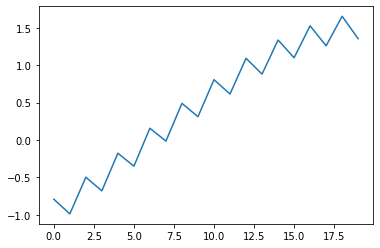

1100 0.4786465565363566


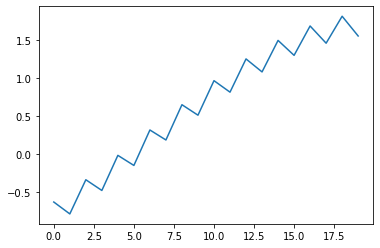

1200 0.48482151826222736


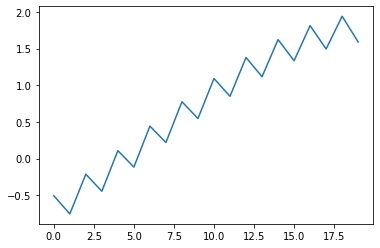

1300 0.4731646776199341


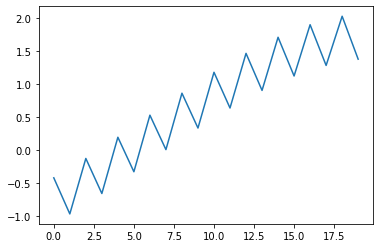

1400 0.47371729214986164


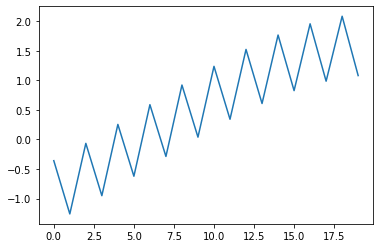

1500 0.4959656397501628


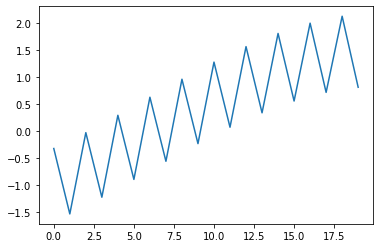

1600 0.5170129140218099


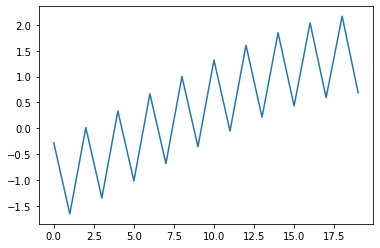

1700 0.5069404443105062


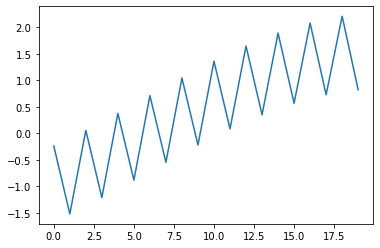

1800 0.492862065633138


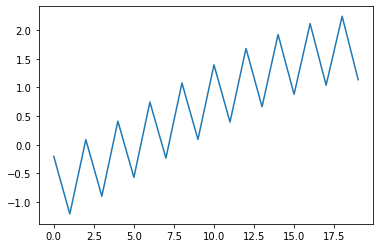

1900 0.4985525608062744


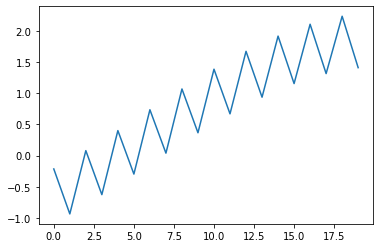

In [5]:
Net=net()
dataset = myd()
loader = DataLoader(dataset=dataset,batch_size=99,shuffle=True)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=Net.parameters(),lr=1e-3)
EPOCH = 2000
loss_his=[]
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u1p = Net(u0)
        
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        Net.eval()
        print(i, loss_his[-1])
        plt.plot((Net(label[50:51].unsqueeze(1))+ label[50:51].unsqueeze(1) - label[51:52].unsqueeze(1))[0,0].detach())
        plt.show()
        Net.train()

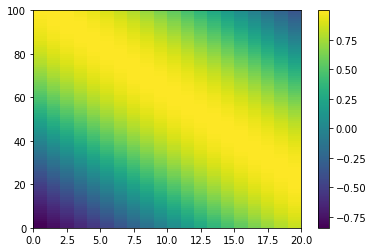

In [6]:
def refer(x,t):
    return torch.sin(x + t/4)

x = torch.linspace(-1,1,20)
t = torch.linspace(0,10,100)
t,x = torch.meshgrid(t,x)
label = refer(x,t)
plt.pcolormesh(label)
plt.colorbar()

class myd(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.u0 = label[:-1].unsqueeze(1)
        self.u1 = label[1:].unsqueeze(1)
    def __getitem__(self, index):
        return self.u0[index], self.u1[index]

    def __len__(self):
        return self.u0.shape[0]

0 0.000390178756788373


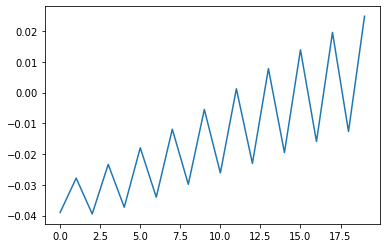

100 0.00041257966465006274


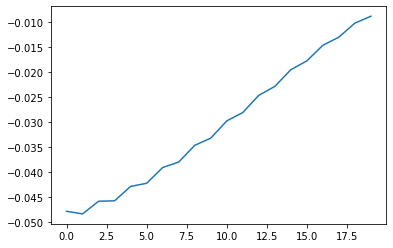

200 0.00030576767555127543


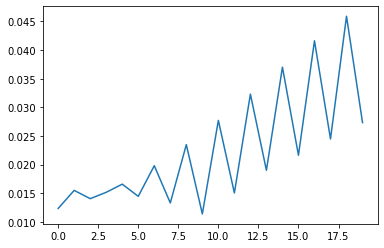

300 0.00019987604658429822


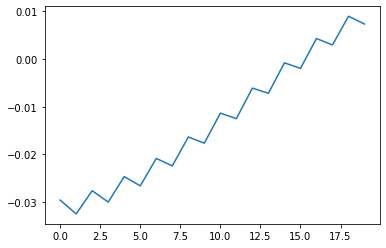

400 0.0009196309062341849


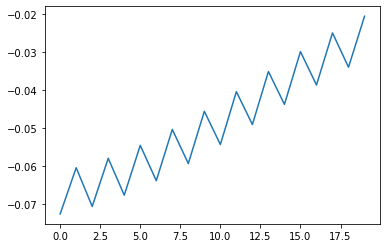

500 0.0011083897358427446


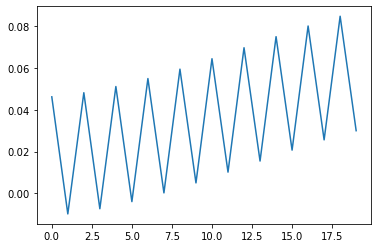

600 0.0007327816759546598


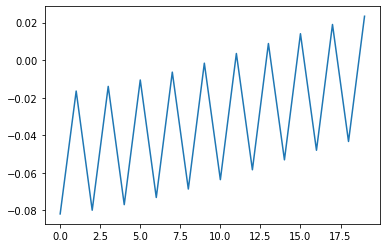

700 0.0008498223808904489


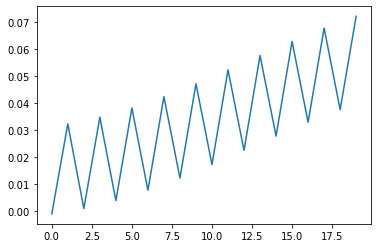

800 0.0002428942631619672


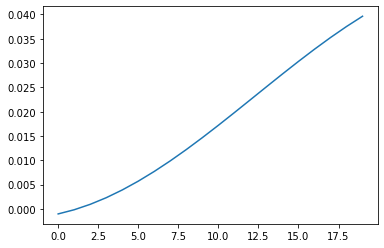

900 0.004700466059148312


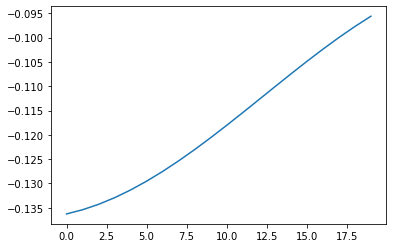

1000 0.0031841235856215158


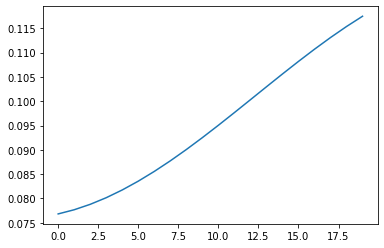

1100 0.001778838224709034


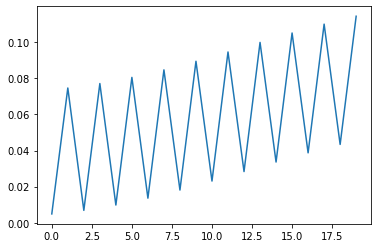

1200 0.0012932091485708952


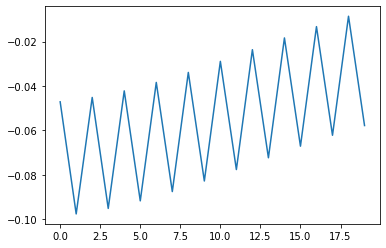

1300 0.003951496755083402


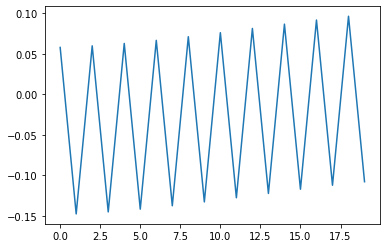

1400 0.0007540512985239426


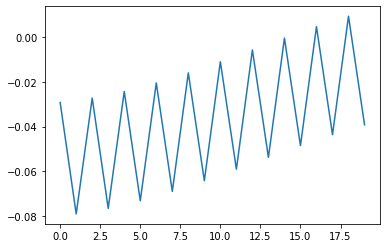

1500 0.002460841555148363


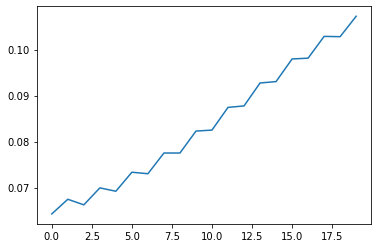

1600 0.0020223399624228477


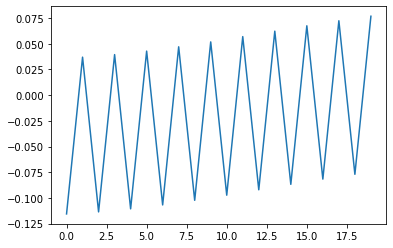

1700 0.00019668875029310584


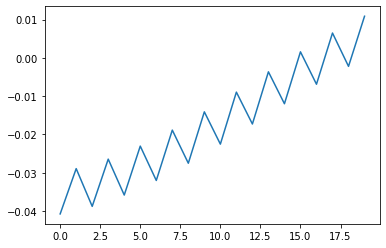

1800 0.00010507291881367564


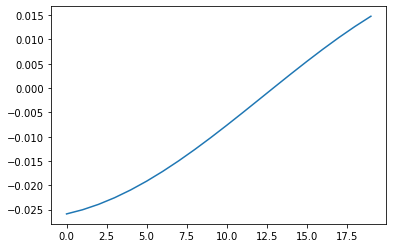

1900 0.00019312162961189946


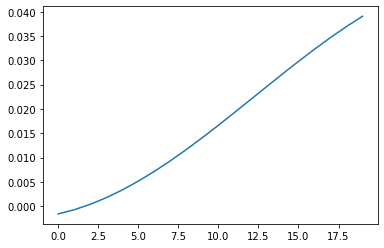

In [7]:
Net=net()
dataset = myd()
loader = DataLoader(dataset=dataset,batch_size=99,shuffle=True)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=Net.parameters(),lr=1e-3)
EPOCH = 2000
loss_his=[]
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u1p = Net(u0)
        
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        Net.eval()
        print(i, loss_his[-1])
        plt.plot((Net(label[50:51].unsqueeze(1))+ label[50:51].unsqueeze(1) - label[51:52].unsqueeze(1))[0,0].detach())
        plt.show()
        Net.train()

torch.Size([100, 1]) torch.Size([100, 1])


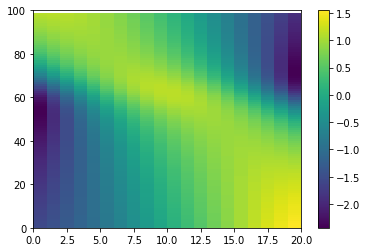

In [8]:
def refer(x,t):
    return 10*(10-t)*torch.sin(x + t/4)
# Normalize each x dimension,, keep temporal pattern
x = torch.linspace(-1,1,20)
t = torch.linspace(0,10,100)
t,x = torch.meshgrid(t,x)
label = refer(x,t)
std = label.std(dim=1,unbiased=False).unsqueeze(1)
mean = label.mean(dim=1).unsqueeze(1)
label = (label-mean)/std
print(mean.shape,std.shape)
plt.pcolormesh(label)
plt.colorbar()
class myd(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.u0 = label[:-1].unsqueeze(1)
        self.u1 = label[1:].unsqueeze(1)
    def __getitem__(self, index):
        return self.u0[index], self.u1[index]

    def __len__(self):
        return self.u0.shape[0]

In [12]:
Net = net()
dataset = myd()
loader = DataLoader(dataset=dataset,batch_size=99,shuffle=True)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=Net.parameters(),lr=1e-3)
EPOCH = 2000
loss_his=[]
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u1p = Net(u0)
        print(u1p)
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        print(loss.grad)
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    # if i%100==0:
    #     Net.eval()
    #     print(i, loss_his[-1])
    #     plt.plot((Net(label[50:51].unsqueeze(1))+ label[50:51].unsqueeze(1) - label[51:52].unsqueeze(1))[0,0].detach())
    #     plt.show()
    #     Net.train()

tensor([[[-0.1336, -0.0902, -0.1330,  ..., -0.2038, -0.1080, -0.2036]],

        [[-0.1207, -0.0704, -0.1289,  ..., -0.1885, -0.1580, -0.1917]],

        [[-0.1365, -0.0962, -0.1308,  ..., -0.2042, -0.1008, -0.2088]],

        ...,

        [[-0.1317, -0.0846, -0.1351,  ..., -0.2032, -0.1132, -0.2025]],

        [[-0.1150, -0.0716, -0.1227,  ..., -0.1930, -0.1646, -0.1920]],

        [[-0.1323, -0.2043, -0.1199,  ..., -0.1123, -0.0862, -0.1162]]],
       grad_fn=<SqueezeBackward1>)
None


/tmp/ipykernel_166888/1981234755.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(loss.grad)


KeyboardInterrupt: 

torch.Size([1, 20]) torch.Size([1, 20])


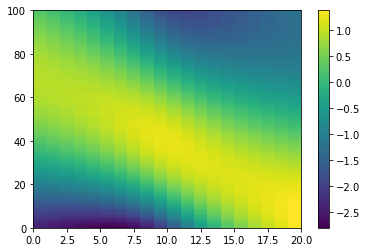

In [13]:
def refer(x,t):
    return 10*(10-t)*torch.sin(x + t/4)
# Normalize each x dimension,, keep temporal pattern
x = torch.linspace(-1,1,20)
t = torch.linspace(0,10,100)
t,x = torch.meshgrid(t,x)
label = refer(x,t)
std = label.std(dim=0,unbiased=False).unsqueeze(0)
mean = label.mean(dim=0).unsqueeze(0)
label = (label-mean)/std
print(mean.shape,std.shape)
plt.pcolormesh(label)
plt.colorbar()
class myd(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.u0 = label[:-1].unsqueeze(1)
        self.u1 = label[1:].unsqueeze(1)
    def __getitem__(self, index):
        return self.u0[index], self.u1[index]

    def __len__(self):
        return self.u0.shape[0]

0 0.0022760226080814996


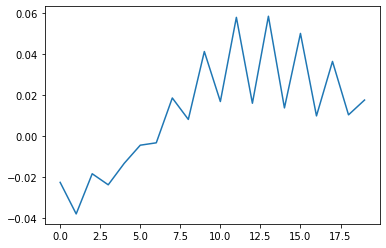

100 0.0012142475849638383


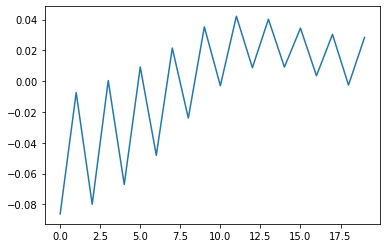

200 0.004368137878676255


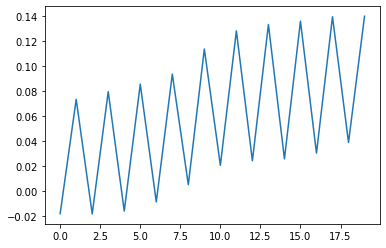

300 0.0016889808078606923


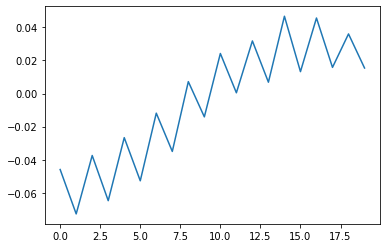

400 0.0013369272152582805


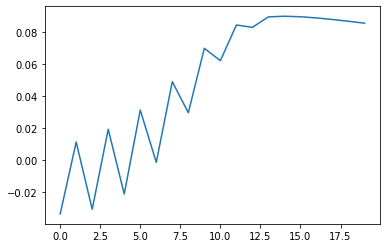

500 0.0045164112622539205


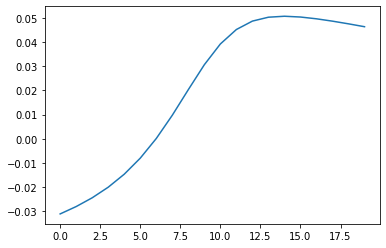

600 0.0020221791540582976


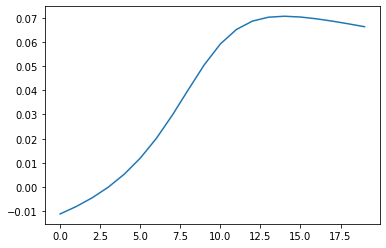

700 0.0011623528165121872


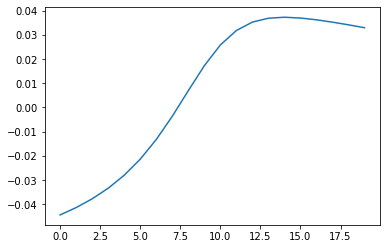

800 0.001050533028319478


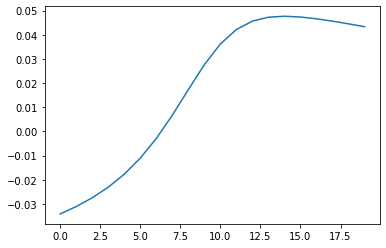

900 0.0019880786227683225


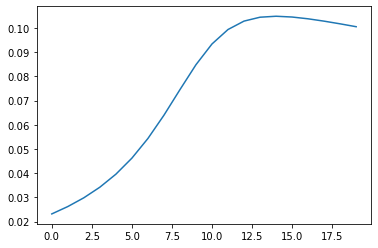

1000 0.004832104779779911


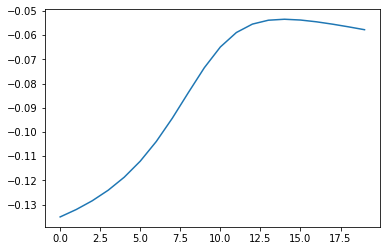

1100 0.0038035723070303598


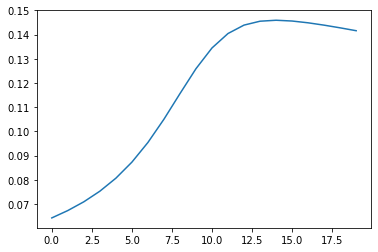

1200 0.0015486834260324638


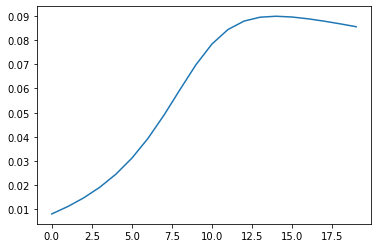

1300 0.008053809404373169


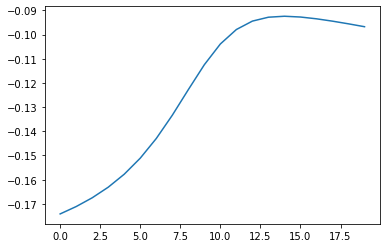

1400 0.0010710159161438544


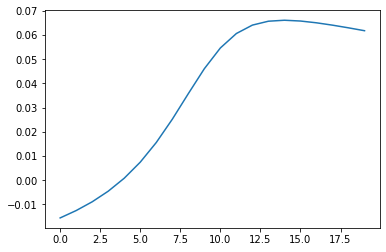

1500 0.009784836942950884


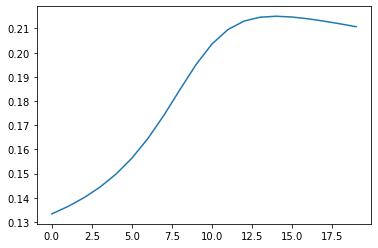

1600 0.0010587015034010012


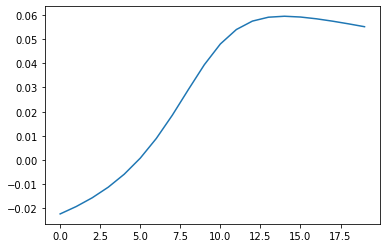

1700 0.010297881439328194


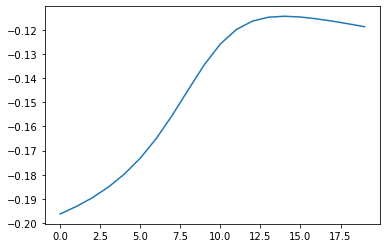

1800 0.00377158106615146


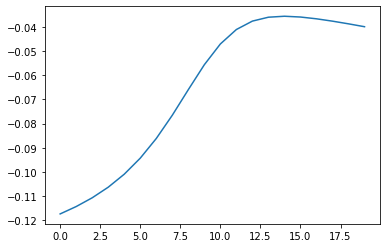

1900 0.0056192713479201


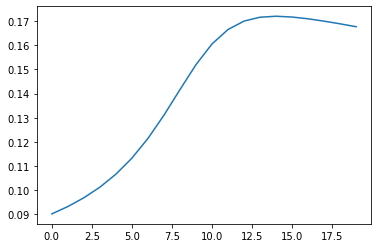

In [15]:
Net = net()
dataset = myd()
loader = DataLoader(dataset=dataset,batch_size=99,shuffle=True)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=Net.parameters(),lr=1e-3)
EPOCH = 2000
loss_his=[]
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u1p = Net(u0)
        # print(u1p)
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        Net.eval()
        print(i, loss_his[-1])
        plt.plot((Net(label[50:51].unsqueeze(1))+ label[50:51].unsqueeze(1) - label[51:52].unsqueeze(1))[0,0].detach())
        plt.show()
        Net.train()

In [ ]:
print(Net)

In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1,8,6, stride=2),
            nn.ReLU(),
            nn.Conv1d(8,32,6),
            nn.ReLU(),
            # PixelShuffle1D(12),
            # nn.Conv1d(1,1,6,stride=6),
            nn.Conv1d(32,20,3)
            # nn.ReLU(),
            # nn.Conv1d(6,1,5,padding=2),
        )
        # self.mlp = nn.Linear(32,20)
    def forward(self,x):
        x = self.conv(x)
        return x.permute(0,2,1)
Net = net()

In [ ]:
dataset = myd()
loader = DataLoader(dataset=dataset,batch_size=99,shuffle=True)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=Net.parameters(),lr=1e-3)
EPOCH = 2000
loss_his=[]
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u1p = Net(u0)
        
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        Net.eval()
        print(i, loss_his[-1])
        plt.plot((Net(label[50:51].unsqueeze(1))+ label[50:51].unsqueeze(1) - label[51:52].unsqueeze(1))[0,0].detach())
        plt.show()
        Net.train()

In [ ]:
class net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(20,60),
            nn.ReLU(),
            nn.Linear(60,120),
            nn.ReLU(),
            nn.Linear(120,60),
            nn.ReLU(),
            nn.Linear(60,20),
        )
    def forward(self,x):
        return self.mlp(x)

In [ ]:
Net2 = net2()
optimizer = torch.optim.Adam(params=Net2.parameters(),lr=1e-3)
EPOCH=2000
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u0,u1=u0.squeeze(),u1.squeeze()
        u1p = Net2(u0)
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        Net.eval()
        print(i, loss_his[-1])
        plt.plot((Net2(label[50:51])+ label[50:51] - label[51:52])[0].detach())
        plt.show()
        Net.train()

In [ ]:
Net2 = net2()
optimizer = torch.optim.Adam(params=Net2.parameters(),lr=1e-4)
EPOCH=10000
for i in range(EPOCH):
    l = 0
    for u0, u1 in loader:
        u0,u1=u0.squeeze(),u1.squeeze()
        u1p = Net2(u0)
        loss=loss_fn(u1p + u0, u1)
        loss.backward()
        optimizer.step()
        l+=loss.item()
    loss_his.append(l/3)
    if i%100==0:
        print(i, loss_his[-1])

In [ ]:
class net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.Sequential(
            nn.RNN(20,60,batch_first=True),
            nn.ReLU(),
            nn.RNN(60,120,batch_first=True),
            nn.ReLU(),
            nn.RNN(120,60,batch_first=True),
            nn.ReLU(),
            nn.RNN(60,20,batch_first=True)
        )
    def forward(self,x):
        return self.rnn(x)

Net3 = net3()

In [ ]:
optimizer = torch.optim.Adam(params=Net3.parameters(),lr=1e-4)
EPOCH = 2000
rlabel = label.unsqueeze(0)
rinp = rlabel[:,:-1]
rout = rlabel[:,1:]
for i in range(EPOCH):

    u1p = Net3(rinp)
    loss=loss_fn(u1p + rinp, rout)
    loss.backward()
    optimizer.step()
    if i%100==0:
        print(i, loss.item())
        plt.pcolormesh((u1p + rinp)[0].detach())
        plt.show()
    
    